# ARIMA TIME SERIES - PRICE PREDICTION

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
%matplotlib inline

# Timeseries packages
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

# MACD packages
import yfinance as yf
import vectorbt as vbt

import warnings
warnings.filterwarnings('ignore')

##

# Data collection and cleaning

In [2]:
# Names of intersted stocks
stock_name = ['AMZN']

tickers = yf.download(tickers = stock_name,
                      start = "2020-01-01", 
                      period="max", 
                      interval = "1d")

tickers.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-26,3299.000000,3332.000000,3296.000000,3316.000000,3316.000000,2098800
2021-08-27,3333.229980,3352.320068,3313.750000,3349.629883,3349.629883,2391300
2021-08-30,3357.429932,3445.000000,3355.219971,3421.570068,3421.570068,3192200
2021-08-31,3424.800049,3472.580078,3395.590088,3470.790039,3470.790039,4356400
2021-09-01,3496.399902,3527.000000,3475.239990,3479.000000,3479.000000,3620000


In [3]:
# Drop duplicates
tickers.drop_duplicates(inplace=False)

# Drop NA and infinite values
tickers = tickers.replace(-np.inf, np.nan).dropna()

tickers.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,1842.0,1853.260010,1832.229980,1847.839966,1847.839966,2506500
2020-01-02,1875.0,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.5,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.0,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.5,1913.890015,1892.040039,1906.859985,1906.859985,4044900


In [4]:
# Count nulls/checking final df
tickers.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##

# Autocorrelation and Partial Autocorrelation Analysis

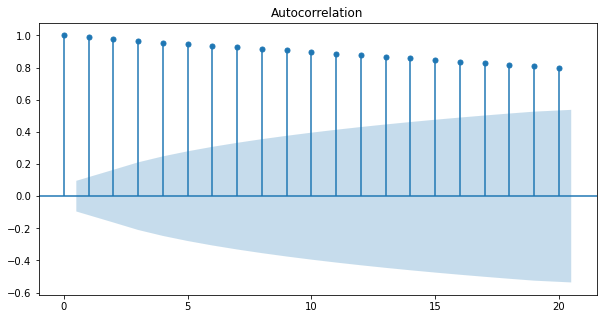

In [5]:
# Plot ACF
plt.rcParams["figure.figsize"] = [10,5]
plot_acf(tickers.Close, lags=20);

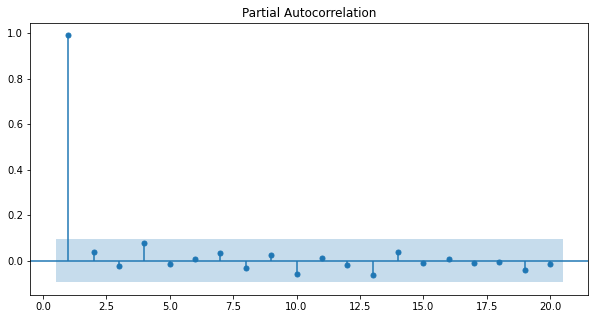

In [6]:
# Plot PACF
plt.rcParams["figure.figsize"] = [10,5]
plot_pacf(tickers.Close, zero=False, lags=20);

In [7]:
# Augmented Dickey-Fuller Test (ADF) Statistical Test for stationarity (https://www.hackdeploy.com/augmented-dickey-fuller-test-in-python/)
adfuller(tickers.Close)

(-1.8007525181924744,
 0.3800881532657051,
 0,
 421,
 {'1%': -3.445978550826048,
  '5%': -2.8684297456394874,
  '10%': -2.570440005247093},
 4440.26694208845)

##

## Create loop to determine best P I Q values for ARIMA

In [8]:
# Get all combinations of [1, 2, 1]
comb1 = combinations_with_replacement([1, 1, 1], 3)

variables_list1 = []

# Print the obtained combinations
for i in list(comb1):
    if i[1] == 1:            
        variables_list1.append(i)
    
print(variables_list1)

[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1)]


In [9]:
# Get all combinations of [1, 1, 2] 
comb2 = combinations_with_replacement([1, 1, 2], 3)

variables_list2 = []

# Print the obtained combinations
for i in list(comb2):
    if i[1] == 1:            
        variables_list2.append(i)
    
print(variables_list2)

[(1, 1, 1), (1, 1, 1), (1, 1, 2), (1, 1, 1), (1, 1, 2), (1, 1, 1), (1, 1, 2)]


In [10]:
# Get all combinations of [1, 1, 3] 
comb3 = combinations_with_replacement([1, 1, 3], 3)

variables_list3 = []

# Print the obtained combinations
for i in list(comb3):
    if i[1] == 1:            
        variables_list3.append(i)
    
print(variables_list3)

[(1, 1, 1), (1, 1, 1), (1, 1, 3), (1, 1, 1), (1, 1, 3), (1, 1, 1), (1, 1, 3)]


In [11]:
# Get all combinations of [2, 1, 3]
comb4 = combinations_with_replacement([2, 1, 3], 3)

variables_list4 = []

# Print the obtained combinations
for i in list(comb4):
    if i[1] == 1:            
        variables_list4.append(i)
    
print(variables_list4)

[(2, 1, 1), (2, 1, 3), (1, 1, 1), (1, 1, 3)]


In [12]:
variables_list = variables_list1 + variables_list2 + variables_list3 + variables_list4

print(variables_list)

[(1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 1), (1, 1, 2), (1, 1, 1), (1, 1, 2), (1, 1, 1), (1, 1, 2), (1, 1, 1), (1, 1, 1), (1, 1, 3), (1, 1, 1), (1, 1, 3), (1, 1, 1), (1, 1, 3), (2, 1, 1), (2, 1, 3), (1, 1, 1), (1, 1, 3)]


In [13]:
results_aic = []
results_bic = []

for combination in variables_list:
    model = ARIMA(tickers['Close'], 
                  order=combination)
    
    results = model.fit()
    
    results_aic.append(results.aic)
    results_bic.append(results.bic)
    
df = pd.DataFrame({'aic':results_aic,
                   'bic':results_bic},
                  index=variables_list).sort_values(by='aic')

In [14]:
aic_df_sorted = df.sort_values(by=['aic'], ascending=False)

aic_df_sorted.head()

,aic,bic
"(2, 1, 1)",4630.360642,4650.573806
"(1, 1, 2)",4630.240338,4650.453502
"(1, 1, 2)",4630.240338,4650.453502
"(1, 1, 2)",4630.240338,4650.453502
"(1, 1, 3)",4629.033682,4653.289479


In [15]:
bic_df_sorted = df.sort_values(by=['bic'], ascending=False)

bic_df_sorted.head()

,aic,bic
"(1, 1, 3)",4629.033682,4653.289479
"(1, 1, 3)",4629.033682,4653.289479
"(1, 1, 3)",4629.033682,4653.289479
"(1, 1, 3)",4629.033682,4653.289479
"(2, 1, 3)",4623.106444,4651.404874


In [16]:
# Rerun ARIMA using optimised AIC (https://stats.stackexchange.com/questions/577/is-there-any-reason-to-prefer-the-aic-or-bic-over-the-other)
model_refined = ARIMA(tickers['Close'],
                      order=aic_df_sorted.index[0])

results_refined = model_refined.fit()

results_refined.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  421
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2310.180
Method:                       css-mle   S.D. of innovations             58.464
Date:                Thu, 02 Sep 2021   AIC                           4630.361
Time:                        21:06:02   BIC                           4650.574
Sample:                             1   HQIC                          4638.349
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8723      2.846      1.360      0.174      -1.707       9.451
ar.L1.D.Close    -0.5897      0.244     -2.415      0.016      -1.068      -0.111
ar.L2.D.Close     0.0341      0.053      0.646      0.518      -0.069       0.137
ma.L1.D.Close     0.5542      0.240      2.309      0.021       0.084       1.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5559           +0.0000j            1.5559            0.5000
AR.2           18.8653           +0.0000j           18.8653            0.0000
MA.1           -1.8046           +0.0000j            1.8046            0.5000
-----------------------------------------------------------------------------
"""

,0
0,3483.429759
1,3487.121075
2,3491.119079
3,3494.911064
4,3498.834991


<AxesSubplot:title={'center':'5 Days Forecast'}>

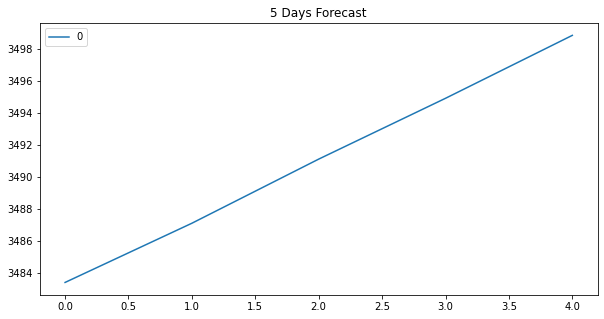

In [17]:
# Forecast close prices
predicted_df = pd.DataFrame(results_refined.forecast(steps=5)[0])

display(predicted_df.head())

plt.rcParams["figure.figsize"] = [10,5]

predicted_df.plot(title="5 Days Forecast")

In [18]:
# Actual close price
actual_close = tickers['Close']

actual_close.head()

Date
2019-12-31    1847.839966
2020-01-02    1898.010010
2020-01-03    1874.969971
2020-01-06    1902.880005
2020-01-07    1906.859985
Name: Close, dtype: float64

In [19]:
# Concat data
prev_predit_df = pd.concat([actual_close, predicted_df],
                           axis=0)

print("Head")
display(prev_predit_df.head())
print()
print("Tail")
display(prev_predit_df.tail())

Head


,0
2019-12-31 00:00:00,1847.839966
2020-01-02 00:00:00,1898.010010
2020-01-03 00:00:00,1874.969971
2020-01-06 00:00:00,1902.880005
2020-01-07 00:00:00,1906.859985



Tail


,0
0,3483.429759
1,3487.121075
2,3491.119079
3,3494.911064
4,3498.834991


In [20]:
# Rename col header
prev_predit_df.rename(columns={0: "Close"}, inplace=True)

# Rename index
prev_predit_df.index.names=["Date"]

# Display final df
prev_predit_df.head()

,Close
Date,
2019-12-31 00:00:00,1847.839966
2020-01-02 00:00:00,1898.010010
2020-01-03 00:00:00,1874.969971
2020-01-06 00:00:00,1902.880005
2020-01-07 00:00:00,1906.859985


##

##

# Prep for MACD 

In [21]:
tickers_df = prev_predit_df.copy()

tickers_df.reset_index(drop=True, 
                       inplace=True)

tickers_df.head()

,Close
0,1847.839966
1,1898.010010
2,1874.969971
3,1902.880005
4,1906.859985


##

## MACD calcualtion and plots

In [22]:
# Calculate MACD data and add to dictionary
macd_list = {}

for ticker in stock_name:
    
    # MACD data
    ewm_fast = tickers_df["Close"].ewm(span = 12, adjust = False).mean()
    
    ewm_slow = tickers_df["Close"].ewm(span = 26, adjust = False).mean()
    
    macd = pd.DataFrame(ewm_fast - ewm_slow)
    
    macd = macd.rename(columns = {"Close":"macd"})
    
    # Signal data
    signal = pd.DataFrame(macd["macd"].ewm(span = 9, adjust = False).mean()).rename(columns = {"macd":"signal"})
    
    # Histogram data
    histogram = pd.DataFrame(macd["macd"] - signal["signal"]).rename(columns = {0:("hist")})
    
    ticker_macd = pd.concat([macd, signal, histogram],
                            axis = 1)
    
    macd_list[ticker] = ticker_macd

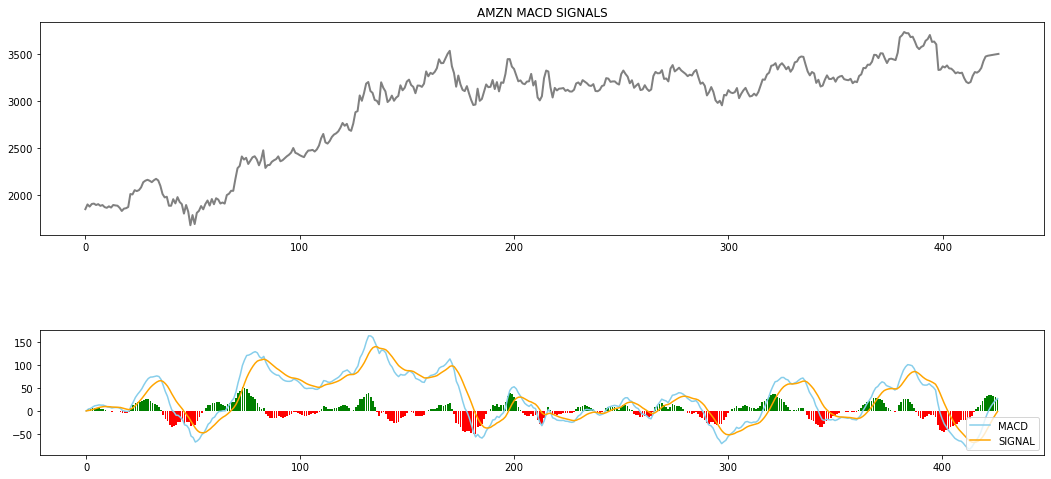

In [23]:
# Plot MACD data per individual stock
for ticker in stock_name:  
    
    plt.rcParams["figure.figsize"] = [18,12]
    
    ax1 = plt.subplot2grid((15,1), (0,0), rowspan = 5, colspan = 5)
    
    ax2 = plt.subplot2grid((15,1), (7,0), rowspan = 3, colspan = 5)

    ax1.plot(tickers_df["Close"], color = 'gray', linewidth = 2, label = ticker)
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'],
             color = 'orange',
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i],
                    color = 'red')
        else:
            
            ax2.bar(macd_list[ticker].index[i], 
                    macd_list[ticker]['hist'][i], 
                    color = 'green')
    
    plt.legend(loc = 'lower right')
    plt.savefig(f"MACD.png", bbox_inches='tight', facecolor='white')
    #plt.show()


##

# Trading Strategy based on MACD

In [24]:
# Create Trading Strategy function
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    # For loop for range of dates
    for i in range(len(data)):
        
        # Conditional produce signal to buy stock
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
                
        # Conditional produce signal to sell stock
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

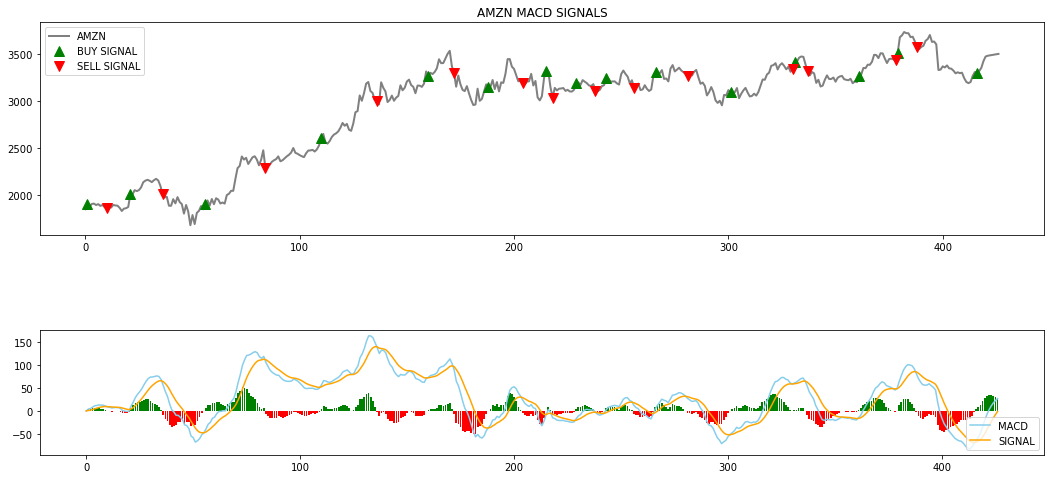

In [25]:
# Run trade strategy and plot buy and sell signals
for ticker in stock_name:  
    
    buy_price, sell_price, macd_signal = implement_macd_strategy(tickers_df["Close"], macd_list[ticker])
    
    plt.rcParams["figure.figsize"] = [18,12]

    ax1 = plt.subplot2grid((15,1), (0,0), rowspan = 5, colspan = 1)
    
    ax2 = plt.subplot2grid((15,1), (7,0), rowspan = 3, colspan = 1)

    ax1.plot(tickers_df["Close"], 
             color = 'gray',
             linewidth = 2,
             label = ticker)
    
    ax1.plot(tickers_df["Close"].index,
             buy_price, 
             marker = '^',
             color = 'green', 
             markersize = 10, 
             label = 'BUY SIGNAL',
             linewidth = 0)
    
    ax1.plot(tickers_df["Close"].index,
             sell_price, 
             marker = 'v', 
             color = 'r',
             markersize = 10,
             label = 'SELL SIGNAL',
             linewidth = 0)
    
    ax1.legend()
    
    ax1.set_title(f'{ticker} MACD SIGNALS')
    
    ax2.plot(macd_list[ticker]['macd'],
             color = 'skyblue',
             linewidth = 1.5, 
             label = 'MACD')
    
    ax2.plot(macd_list[ticker]['signal'], 
             color = 'orange', 
             linewidth = 1.5,
             label = 'SIGNAL')

    for i in range(len(macd_list[ticker])):
        
        if str(macd_list[ticker]['hist'][i])[0] == '-':
            
            ax2.bar(macd_list[ticker].index[i],
                    macd_list[ticker]['hist'][i], 
                    color = 'r')
        else:
            
            ax2.bar(macd_list[ticker].index[i],
                    macd_list[ticker]['hist'][i], 
                    color = 'g')
        
    plt.legend(loc = 'lower right')
    plt.savefig(f"TradeSignal.png", bbox_inches='tight', facecolor='white')    
    plt.show()

In [26]:
# Run strategy to create position
stock_strategy = {}

for ticker in stock_name:     
    
    buy_price, sell_price, macd_signal = implement_macd_strategy(tickers_df["Close"], macd_list[ticker])

    position = []
    
    for i in range(len(macd_signal)):        
        if macd_signal[i] > 1:
            position.append(0)
        else:
            position.append(1)
            
    for i in range(len(tickers_df['Close'])):
        if macd_signal[i] == 1:
            position[i] = 1
        elif macd_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
            
    macd = macd_list[ticker]['macd']
    
    signal = macd_list[ticker]['signal']
    
    close_price = tickers_df["Close"]
    
    macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(tickers_df["Close"].index)
    
    position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(tickers_df["Close"].index)

    frames = [close_price, macd, signal, macd_signal, position]
    
    stock_strategy = pd.concat(frames, 
                               join = 'inner',
                               axis = 1)

In [27]:
# Check strategy df
stock_strategy

,Close,macd,signal,macd_signal,macd_position
0,1847.839966,0.000000,0.000000,0,1
1,1898.010010,4.002169,0.800434,1,1
2,1874.969971,5.254210,1.691189,0,1
3,1902.880005,8.401719,3.033295,0,1
4,1906.859985,11.089461,4.644528,0,1
...,...,...,...,...,...
422,3483.429759,2.344555,-32.288700,0,1
423,3487.121075,10.564715,-23.718017,0,1
424,3491.119079,17.203545,-15.533704,0,1
425,3494.911064,22.511351,-7.924693,0,1


##

# Backtesting

In [28]:
# Create dictionary and populate according to macd_signal
stock_signals = {}

for ticker in tickers:
    entries = []
    exits = []
    
    for sig in stock_strategy["macd_signal"]:
        
        if sig == -1:
            entries.append("False")
            exits.append("True")
        elif sig == 1:
            entries.append("True")
            exits.append("False")
        else:
            entries.append("False")
            exits.append("False")
            
    entries = pd.Series(entries,
                        index = tickers_df["Close"].index)
    
    exits = pd.Series(exits, index = tickers_df["Close"].index)
    
    # Change type to bool
    entries = entries == "True"
    exits = exits == "True"
    
    # Create dataframe
    entries = pd.DataFrame(entries).rename(columns = {0:'entries'}).set_index(tickers_df["Close"].index)
    
    exits = pd.DataFrame(exits).rename(columns = {0:'exits'}).set_index(tickers_df["Close"].index)
    
    close_price = tickers_df["Close"]
    
    frames = [close_price,
              entries, 
              exits]
    
    signals = pd.concat(frames, join = 'inner', axis = 1)

    stock_signals[ticker] = signals

In [31]:
# Initial investment
init_cash = 100000

# Total profit earned from holding stock. Timeframe 3 months
for ticker in stock_name:
    
    price = vbt.YFData.download(ticker, period='6mo').get('Close')
    
    portfolio = vbt.Portfolio.from_holding(price,
                                           init_cash = init_cash)
    
portfolio.total_profit() 

print(f"The total profit of just holding the stock is ${portfolio.total_profit():.2f}")

The total profit of just holding the stock is $12424.18


In [32]:
total_profit = []

for ticker in tickers:
    # Build portfolio using macd signals
    portfolio = vbt.Portfolio.from_signals(stock_signals[ticker]["Close"],
                                           stock_signals[ticker]["entries"],
                                           stock_signals[ticker]["exits"],
                                           init_cash = init_cash)

    # Total profit
    total_profit.append(portfolio.total_profit())
    
print(f"The total profit of exercising MACD signals are ${sum(total_profit):.2f}")

The total profit of exercising MACD signals are $246977.82
